# SDV demo
- the objective this demo is to show how SDV works and what it can do, so that people will get familiar with the API
- Also, we do a simple demonstration with GaussianCopula Model, which is a model for building single Table Data. 

In [3]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [7]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

In [15]:
tables["users"]
tables["sessions"]
tables["transactions"]

,transaction_id,session_id,timestamp,amount,cancelled
0,0,0,2019-01-01 12:34:32,100.0,False
1,1,0,2019-01-01 12:42:21,55.3,False
2,2,1,2019-01-07 17:23:11,79.5,False
3,3,3,2019-01-10 11:08:57,112.1,True
4,4,5,2019-01-10 21:54:08,110.0,True
5,5,5,2019-01-11 11:21:20,76.3,False
6,6,7,2019-01-22 14:44:10,89.5,False
7,7,8,2019-01-23 10:14:09,132.1,True
8,8,9,2019-01-27 16:09:17,68.0,False
9,9,9,2019-01-29 12:10:48,99.9,False


In [17]:
# SDV api를 이용해서 모델을 핏팅시켜준다.

from sdv import SDV
sdv = SDV()

sdv.fit(metadata, tables)

/home/wonseok/python36/lib64/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
sdv.save('sdv.pkl')

In [19]:
samples = sdv.sample()

In [20]:
samples

{'users':    user_id country gender  age
 0        0      ES    NaN   37
 1        1      US    NaN   50
 2        2      BG    NaN   32
 3        3      UK    NaN   34
 4        4      US    NaN   34
 5        5      UK    NaN   28
 6        6      US      M   14
 7        7      DE      M   57
 8        8      US    NaN   47
 9        9      US      F   43,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  tablet  android        7
 1           1        0  tablet  android        5
 2           2        0  tablet  android        8
 3           3        3  tablet      ios       -1
 4           4        4  mobile      ios       11
 5           5        6  mobile      ios       34
 6           6        7  tablet      ios       17
 7           7        7  mobile      ios       24
 8           8        9  mobile  android        9,
 'transactions':    transaction_id  session_id           timestamp      amount  cancelled
 0               0           4 2019

이렇게 sdv를 이용해서 fit을 시켜줄 수도 있겠다.

In [31]:
import pandas as pd
df = pd.read_pickle("incidence_df_with_na.pickle")

# 데이터가 너무 크기 때문에 일단 작은 양에 대해서 진행해본다.
df =df.iloc[0:800]

### Table data를 다양한 모델을 이용해서 data generation을 할 수 있는데, SDV에는 4가지 모델이 있다.
- GaussianCopula Model 
    - 각 변수들의 marginal을 계산하여 변수들간의 상관성을 계산해주어 새로운 table 형식의 데이터를 생산해준다. 
- CTGAN Model
- CopulaGAN Model
- TVAE Model

In [27]:
#1. 먼저 copula 모델을 이용해보자.

from sdv.tabular import GaussianCopula as GC

model = GC()

In [37]:
model.fit(df)
print("..complete");

/home/wonseok/python36/lib64/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/wonseok/python36/lib64/python3.6/site-packages/copulas/univariate/truncated_gaussian.py:43: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/home/wonseok/python36/lib64/python3.6/site-packages/copulas/univariate/truncated_gaussian.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale
/home/wonseok/python36/lib64/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
/home/wonseok/python36/lib64/python3.6/site-packages/copulas/univariate/truncated_gaussian.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.

..complete


In [38]:
model.sample(10)

,PUBCSNUM,REG,MAR_STAT,RACE1V,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,...,DSRPSG,DASRCT,DASRCN,DASRCM,DASRCTS,DASRCNS,DASRCMS,TNMEDNUM,METSDXLN,METSDXO
0,5113134,1502,4,-6,NaN,1,79,1927,2,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5109644,1502,2,10,NaN,2,82,1916,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5110081,1502,1,2,NaN,1,60,1911,2,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5116804,1502,1,1,NaN,1,78,1911,2,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5115857,1502,2,3,NaN,2,71,1917,2,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5117887,1502,2,3,NaN,1,57,1916,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5111738,1502,2,5,NaN,1,85,1925,2,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5118092,1502,2,5,NaN,2,68,1909,2,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5108653,1502,2,3,NaN,2,66,1915,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5100566,1502,3,-4,NaN,1,66,1930,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df

,PUBCSNUM,REG,MAR_STAT,RACE1V,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,...,DSRPSG,DASRCT,DASRCN,DASRCM,DASRCTS,DASRCNS,DASRCMS,TNMEDNUM,METSDXLN,METSDXO
0,5100047,1502,5,2,NaN,2,77,1915,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5100055,1502,2,1,NaN,2,77,1918,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5100086,1502,2,1,NaN,1,53,1930,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5100100,1502,5,1,NaN,2,77,1931,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5100102,1502,9,1,NaN,1,91,1889,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,5119806,1502,2,1,NaN,1,78,1916,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796,5119813,1502,1,1,NaN,2,71,1920,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,5119871,1502,2,1,NaN,2,63,1943,2,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
798,5119877,1502,3,1,NaN,1,95,1885,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 해설
- model fitting의 과정에서 Reversible Data Transforms를 이용하게 되는데, 이렇게 하는 이유는 GaussianMultivariate 모델이 이것을 핸들링 해줄 수 있게 하기 때문이다.
- 모델을 만들 경우 모델은 원본데이터에 대한 정보가 전혀 있지 않다. 그렇기 때문에 굉장히 가벼운 형태가 된다. 
- 또, key variable을 명시해줄 경우 key variable은 unique하다고 모델이 알아듣게 된다. 
    - e.g. primary_key = 'variable_key'



### 익명화
- pii(personally identifiable information)이라고 했을 때, anonymize_fields 인자를 넣어주면 이것을 다 할 수 있다. 
    - ```
    model = GaussianCopula(
                    primary_key = 'student_id',
                    anonymize_fields = {
                            'address' : 'address' # 이런식으로!
                            })
      ```
      

In [ ]:
# 예시
model = GaussianCopula(
    primary_key = 'student_id',
    anonymize_fields = {
        'address':'address'
    }
)

### 분포 확인
- fit을 시켰을 때 모델에서 벌어지는 일
    - 주어진 데이터의 포맷(형식)과 데이터 타입들에 대해서 인식한다.
    - 비수치형 데이터와 null 데이터에 대해서 수치적 representation을 얻는데, 이는 Reversible Data Transforms를 통해서 한다. 이는 데이터의 확률분포를 계산하게 도와준다.
    - 테이블 각 컬럼의 확률분포를 계산한다.
    - 각 수치형 컬럼의 값들을 marginal distribution CDF 값들로 변환시킨다. 그리고 inverse CDF transformation 방법을 사용해서 표준정규분포로 변환시켜준다. 
    - 새롭게 바뀐 확률변수들간에 상관관계를 계산해준다.
    - 이제 fitting은 끝난 것이다.
    
    - fitting 이후로 샘플링을 진행할 시, multivariage 표준정규분포로부터 상관성을 고려해 샘플링을 진행한다.
    - 샘플링된 값들의 standard normal CDF inverse CDF 방법을 이용해서 계산한다.
    - Reversible Data Transform을 이용해서 다시 원본 데이터 형식으로 복원한다.


- 이미 fit을 시켜주면서 분포를 계산하는 과정이 내부적으로 일어난다.
- 모델이 학습한 분포를 보기 위해서는 `get_distributions` 메서드를 이용해준다.

In [44]:
model.get_distributions()

{'PUBCSNUM': 'copulas.univariate.beta.BetaUnivariate',
 'REG': 'copulas.univariate.beta.BetaUnivariate',
 'MAR_STAT': 'copulas.univariate.gaussian.GaussianUnivariate',
 'RACE1V': 'copulas.univariate.gaussian.GaussianUnivariate',
 'SEX': 'copulas.univariate.gamma.GammaUnivariate',
 'AGE_DX': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'SEQ_NUM': 'copulas.univariate.student_t.StudentTUnivariate',
 'MDXRECMP': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'YEAR_DX': 'copulas.univariate.beta.BetaUnivariate',
 'LATERAL': 'copulas.univariate.gaussian.GaussianUnivariate',
 'HISTO2V': 'copulas.univariate.log_laplace.LogLaplace',
 'BEHO2V': 'copulas.univariate.log_laplace.LogLaplace',
 'HISTO3V': 'copulas.univariate.log_laplace.LogLaplace',
 'BEHO3V': 'copulas.univariate.log_laplace.LogLaplace',
 'GRADE': 'copulas.univariate.log_laplace.LogLaplace',
 'DX_CONF': 'copulas.univariate.log_laplace.LogLaplace',
 'REPT_SRC': 'copulas.univariate.student_t.StudentTUnivariat

2    232
9    222
3    164
1    121
4     61
Name: GRADE, dtype: int64


<AxesSubplot:>

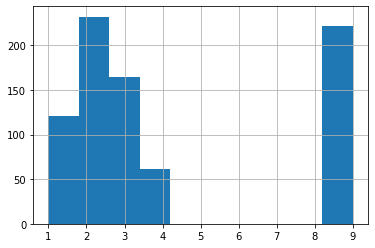

In [50]:
# 특정 컬럼의 분포를 살펴보자.
print(df.GRADE.value_counts())

df["GRADE"].hist()

In [54]:
# 모델에서 approximate한 분포를 살펴보자.
# logLaplace라고 나와있다.
model.get_distributions()["GRADE"]

'copulas.univariate.log_laplace.LogLaplace'

각 컬럼 distribution에 맞는 분포를 만들기 위해서는 `field_distributions` 아규먼트를 딕셔너리의 형태로 입력해주면 된다.
- 가능한 분포
    - univariate, parametrc, bounded, semi_bounded, gaussian, gamma, beta, truncated_gaussian..etc
  

In [ ]:
model = GaussianCopula(
                primary_key = 'student_id'
                field_distributions = {
                    'experience_years' : 'gamma' # 이런식으로 아규먼트를 입력해주면 gamma 분포로 계산해준다.
                }
)
model.fit

### Conditional Sampling
- 이 방법은 조건부 확률분포 아래서 모델로부터 샘플링하는 방법이다. 
- 조건을 걸어줄 때 `conditions` 파라미터에 조건을 주고, model에서 샘플링을 할 때 sample 메서드에 인자로 넣어주면 된다.

In [ ]:
conditions = {'gender':"M"}
model.sample(5, conditions=conditions)
# 당연히 조건은 추가할 수 있다.

conditions = {"gender":"M", 'experience':0}

In [ ]:
# 데이터 프레임 형식으로 컨디션 주는 방법

conditions = pd.DataFrame({'gender':['M','M','M','F','F']})

model.sample(conditions = conditions)

In [ ]:
# 연속형 변수에 대해서 condition 주는 방법
conditions = { 'degree_perc' : 70.0}
# 대신 우리가 학습용으로 넣어준 데이터에 70보다 작은 값만 존재했다면 이는 불가능해지므로 에러가 난다. 

# To sum up
- we've seen how sdv works and a simple demonstration of using GaussianCopula Model. 
- we've also briefly looked at how the distribution estimating process is done in our models, how it samples data points. Also some useful functions such as setting key variables, preserving privacy, setting specific distributions, conditional sampling. 
- In the next demo, we will be looking at sdv's timeseries Data API